In [1]:
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly
import json


from pandas_datareader import data as web
from datetime import datetime as db
import dash_table_experiments as dt


#merged_event = pd.read_json('C://walks_data//merged_Event.json')
merged_event = pd.read_excel('C://walks_data//merged_Event.xlsx')
#dff = pd.DataFrame(merged_event[merged_event.name_short == 'Statue of Liberty & 9/11 Full Day '])
#Pristine_Sistine_booking= pd.DataFrame(dff["events_datetimes"].value_counts())
#Pristine_Sistine_booking_sorted = Pristine_Sistine_booking.sort_index()

app = dash.Dash('booking')


app.layout = html.Div([html.Div([html.H2('Booking in advance'),

html.Div([html.H4('Booking Distribution according to city and package location'),
          html.P("Select the Dropdown Menu to See Booking Distribution"),
          dcc.Dropdown(
              id='my-dropdown',
              options=[
                  {'label': 'Rome - Premium Colosseum', 'value': "Rome - Premium Colosseum"},
                  {'label': 'Vatican - Pristine Sistine', 'value': 'Vatican - Pristine Sistine'},
                  {'label': 'Florence - Best of Florence', 'value': 'Florence - Best of Florence'},
                  {'label': 'Rome - Crypts & Catacombs', 'value': 'Rome - Crypts & Catacombs'},
                  {'label': 'Venice - Legendary Venice', 'value': 'Venice - Legendary Venice'},
                  {'label': 'Pompeii - Best of Pompeii', 'value': 'Pompeii - Best of Pompeii'},
                  {'label': 'Rome - Welcome to Rome ', 'value': 'Rome - Welcome to Rome '},
                  {'label': 'Rome - VIP Colosseum Underground', 'value':'Rome - VIP Colosseum Underground'},
                  {'label': 'Statue of Liberty & 9/11 Full Day ', 'value': 'Statue of Liberty & 9/11 Full Day '},
                  {'label': 'VIP Manhattan Nightlife Tour by Limo', 'value': 'VIP Manhattan Nightlife Tour by Limo'},
                  {'label': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty', 'value': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty'},
                  {'label': 'POP UP TOUR NYC - Chinatown ', 'value': 'POP UP TOUR NYC - Chinatown '}
              ],
              value='Vatican - Pristine Sistine'
          ),
          dcc.Graph(id='month-graph')
         ], 
         style={'width': '40%'}), 
                       

html.Div([html.H4('Pick the event date for particular location to see the distribution'),
    dcc.DatePickerSingle(
        id='my-date-picker-single',
        min_date_allowed=db(2015, 1, 5),
        max_date_allowed=db(2018, 11, 11),
        initial_visible_month=db(2017, 8, 5),
        date=db(2017, 5, 11)
    ),
          html.Div(id='output-container-date-picker-single') ]) ,
                                 
    html.Div([html.H4("Distribution of booking for particular date"), 
              dcc.Graph(figure={'data': [{'x':[1,2], 'y': [3, 1]}]}, id='way-graph')],
          style={'width': '55%','float': 'right', 'display': 'inline-block'})
    ]),
                       
#html.Div([
#    html.H4('DataTable'),
#    dt.DataTable(
#        dataframe=merged_event.to_dict('split'),
#        filterable=True,
#        sortable=True
#    )
#])

])



@app.callback(Output('month-graph', 'figure'), [Input('my-dropdown', 'value')])

def update_graph(selected_dropdown_value):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    Pristine_Sistine_booking= pd.DataFrame(dff["events_datetimes"].value_counts())
    Pristine_Sistine_booking_sorted = pd.DataFrame(Pristine_Sistine_booking.sort_index())
    prisitine = pd.DataFrame(Pristine_Sistine_booking_sorted)
    prisitine = pd.to_datetime(prisitine.index)
    return {
        'data': [{
            'x': prisitine,
            'y': Pristine_Sistine_booking_sorted.events_datetimes
        }],
            'layout': {'margin': {'l': 50, 'r': 5, 't': 20, 'b': 65}}
    }
app.css.append_css({'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})

@app.callback(
    dash.dependencies.Output('output-container-date-picker-single', 'children'),
    [dash.dependencies.Input('my-date-picker-single', 'date')])
def update_output(date):
    string_prefix = 'You have selected: '
    if date is not None:
        date = db.strptime(date, '%Y-%m-%d')
        date_string = date.strftime('%B %d, %Y')
        return string_prefix + date_string

@app.callback(
    dash.dependencies.Output('way-graph', 'figure'),
    [dash.dependencies.Input('my-date-picker-single', 'date'),
    dash.dependencies.Input('my-dropdown', 'value')])
def update_graph(date, selected_dropdown_value):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())
    dff["timedate"] = pd.to_datetime(dff.timedate)
    selected_event = pd.DataFrame(dff[dff.timedate == date])
    selected_event_count = pd.DataFrame(selected_event.booking_date.value_counts())
    selected_event_count_sorted = pd.DataFrame(selected_event_count.sort_index())
    event = pd.DataFrame(selected_event_count_sorted)
    event['Date'] = pd.to_datetime(event.index)
    event['Date'] = pd.to_datetime(event['Date'], errors='coerce').apply(lambda x: x.date())
    event['Date'] = pd.to_datetime(event.Date)
    event_count = pd.DataFrame(event["Date"].value_counts())
    event_count_sorted = pd.DataFrame(event_count.sort_index())
    events = pd.DataFrame(event_count_sorted)
    events = pd.to_datetime(events.index)
    return {
        'data': [{
            'x': events,
            'y': event_count_sorted.Date
        }],
            'layout': {'margin': {'l': 50, 'r': 5, 't': 20, 'b': 65}}
    }
app.css.append_css({'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})


if __name__ == '__main__':
    app.run_server(debug=False)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2017 08:53:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 08:53:07] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 08:53:07] "GET /_dash-layout HTTP/1.1" 200 -
[2017-12-12 08:53:07,688] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\_compat.py", line 33, in reraise
    raise value
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1612, in fu

In [2]:
# USe this one for to show

import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly
import json


from pandas_datareader import data as web
from datetime import datetime as db
import dash_table_experiments as dt


#merged_event = pd.read_json('C://walks_data//merged_Event.json')
merged_event = pd.read_excel('C://walks_data//merged_Event.xlsx')
#dff = pd.DataFrame(merged_event[merged_event.name_short == 'Statue of Liberty & 9/11 Full Day '])
#Pristine_Sistine_booking= pd.DataFrame(dff["events_datetimes"].value_counts())
#Pristine_Sistine_booking_sorted = Pristine_Sistine_booking.sort_index()


dff = pd.DataFrame(merged_event[merged_event.name_short == 'Vatican - Pristine Sistine'])
dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())
dff["timedate"] = pd.to_datetime(dff.timedate)
selected_event = pd.DataFrame(dff[dff.timedate == "2017-05-11"])

DF_SIMPLE = pd.DataFrame({
    'x': ['A', 'B', 'C', 'D', 'E', 'F'],
    'y': [4, 3, 1, 2, 3, 6],
    'z': ['a', 'b', 'c', 'a', 'b', 'c']
})



dataframes = {'Booking_per_location': merged_event,
              'Booking_Per_event_date': selected_event}

#Table selection for user function defined

def get_data_object(user_selection):
    '''
    For user selections, return the relevant in-memory data frame.
    '''
    return dataframes[user_selection]

app = dash.Dash('booking')


app.layout = html.Div([html.Div([html.H2('Booking in advance'),
                                 
                             
html.Div([html.H4("Distribution of booking for particular date"), 
              dcc.Graph(figure={'data': [{'x':[1,2], 'y': [3, 1]}]}, id='way-graph')],
          style={'width': '55%','float': 'right', 'display': 'inline-block'})
]),
      
html.Div([html.H4('Booking Distribution according to city and package location'),
          html.P("Select the Dropdown Menu to See Booking Distribution"),
          dcc.Dropdown(
              id='my-dropdown',
              options=[
                  {'label': 'Rome - Premium Colosseum', 'value': "Rome - Premium Colosseum"},
                  {'label': 'Vatican - Pristine Sistine', 'value': 'Vatican - Pristine Sistine'},
                  {'label': 'Florence - Best of Florence', 'value': 'Florence - Best of Florence'},
                  {'label': 'Rome - Crypts & Catacombs', 'value': 'Rome - Crypts & Catacombs'},
                  {'label': 'Venice - Legendary Venice', 'value': 'Venice - Legendary Venice'},
                  {'label': 'Pompeii - Best of Pompeii', 'value': 'Pompeii - Best of Pompeii'},
                  {'label': 'Rome - Welcome to Rome ', 'value': 'Rome - Welcome to Rome '},
                  {'label': 'Rome - VIP Colosseum Underground', 'value':'Rome - VIP Colosseum Underground'},
                  {'label': 'Statue of Liberty & 9/11 Full Day ', 'value': 'Statue of Liberty & 9/11 Full Day '},
                  {'label': 'VIP Manhattan Nightlife Tour by Limo', 'value': 'VIP Manhattan Nightlife Tour by Limo'},
                  {'label': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty', 'value': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty'},
                  {'label': 'POP UP TOUR NYC - Chinatown ', 'value': 'POP UP TOUR NYC - Chinatown '}
              ],
              value='Vatican - Pristine Sistine'
          ),
          dcc.Graph(id='month-graph')
         ], 
         style={'width': '40%'}), 
                                 
                                 
#Table Layout                           
                                 
html.Div([
    html.H4('DataTable'),
    html.Label('Report type:', style={'font-weight': 'bold'}),
    dcc.Dropdown(
        id='field-dropdown',
        options=[{'label': df, 'value': df} for df in dataframes],
        value='merged_event',
        clearable=False
    ),
    dt.DataTable(
        # Initialise the rows
        rows=[{}],
        row_selectable=True,
        filterable=True,
        sortable=True,
        selected_row_indices=[],
        id='table'
    ),
    html.Div(id='selected-indexes')
], className="container", style={'width': '55%','float': 'right', 'display': 'inline-block'}),
                       
# DatePicker
                           
html.Div([html.H4('Pick the event date for particular location to see the distribution'),
    dcc.DatePickerSingle(
        id='my-date-picker-single',
        min_date_allowed=db(2015, 1, 5),
        max_date_allowed=db(2018, 11, 11),
        initial_visible_month=db(2017, 8, 5),
        date=db(2017, 5, 11)
    ),
          html.Div(id='output-container-date-picker-single') ]) ,
                       
#html.Div([
#    html.H4('DataTable'),
#    dt.DataTable(
#        dataframe=merged_event.to_dict('split'),
#        filterable=True,
#        sortable=True
#    )
#])


                                              
])



@app.callback(Output('month-graph', 'figure'), [Input('my-dropdown', 'value')])

def update_graph(selected_dropdown_value):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    Pristine_Sistine_booking= pd.DataFrame(dff["events_datetimes"].value_counts())
    Pristine_Sistine_booking_sorted = pd.DataFrame(Pristine_Sistine_booking.sort_index())
    prisitine = pd.DataFrame(Pristine_Sistine_booking_sorted)
    prisitine = pd.to_datetime(prisitine.index)
    return {
        'data': [{
            'x': prisitine,
            'y': Pristine_Sistine_booking_sorted.events_datetimes
        }],
            'layout': {'margin': {'l': 50, 'r': 5, 't': 20, 'b': 65}}
    }
app.css.append_css({'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})

@app.callback(
    dash.dependencies.Output('output-container-date-picker-single', 'children'),
    [dash.dependencies.Input('my-date-picker-single', 'date')])
def update_output(date):
    string_prefix = 'You have selected: '
    if date is not None:
        date = db.strptime(date, '%Y-%m-%d')
        date_string = date.strftime('%B %d, %Y')
        return string_prefix + date_string

@app.callback(
    dash.dependencies.Output('way-graph', 'figure'),
    [dash.dependencies.Input('my-date-picker-single', 'date'),
    dash.dependencies.Input('my-dropdown', 'value')])
def update_graph(date, selected_dropdown_value):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())
    dff["timedate"] = pd.to_datetime(dff.timedate)
    selected_event = pd.DataFrame(dff[dff.timedate == date])
    selected_event_count = pd.DataFrame(selected_event.booking_date.value_counts())
    selected_event_count_sorted = pd.DataFrame(selected_event_count.sort_index())
    event = pd.DataFrame(selected_event_count_sorted)
    event['Date'] = pd.to_datetime(event.index)
    event['Date'] = pd.to_datetime(event['Date'], errors='coerce').apply(lambda x: x.date())
    event['Date'] = pd.to_datetime(event.Date)
    event_count = pd.DataFrame(event["Date"].value_counts())
    event_count_sorted = pd.DataFrame(event_count.sort_index())
    events = pd.DataFrame(event_count_sorted)
    events = pd.to_datetime(events.index)
    return {
        'data': [{
            'x': events,
            'y': event_count_sorted.Date
        }],
            'layout': {'margin': {'l': 50, 'r': 5, 't': 20, 'b': 65}}
    }
app.css.append_css({'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})

# Update Table

@app.callback(Output('table', 'rows'), [Input('field-dropdown', 'value')])
def update_table(user_selection):
    '''
    For user selections, return the relevant table
    '''
    df = get_data_object(user_selection)
    return df.to_dict('records')


app.css.append_css({
    "external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"
})


if __name__ == '__main__':
    app.run_server(debug=False)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Dec/2017 13:25:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:25:39] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:25:39] "GET /_dash-dependencies HTTP/1.1" 200 -
[2017-12-29 13:25:39,480] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\_compat.py", line 33, in reraise
    raise value
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1612, in fu

In [ ]:
dash.dependencies.Output('output-container-date-picker-single', 'children'),

In [3]:
merged_event = pd.read_excel('C://walks_data//merged_Event.xlsx')

In [6]:
merged_event.head()

,events_id,amount_local,number_adults,number_students,number_children,number_seniors,number_infants,res_expiry_date,bookings_type,stage_id,booking_date,name_short,group_size,city,events_datetimes
0,9.0,0.0,4.0,0.0,2.0,2.0,0.0,2015-02-19 18:41:06,Private,1.000009e+18,2012-07-14 07:47:57,Rome - Premium Colosseum,15.0,Roma,2013-05-07 09:30:00
1,9.0,0.0,25.0,0.0,0.0,0.0,0.0,2015-02-19 18:41:05,Group,1.000009e+18,1970-01-01 00:00:00,Rome - Premium Colosseum,15.0,Roma,2013-05-09 09:30:00
2,9.0,0.0,2.0,0.0,2.0,2.0,0.0,2015-02-19 18:41:06,Group,1.000009e+18,1970-01-01 00:00:00,Rome - Premium Colosseum,15.0,Roma,2013-05-09 09:30:00
3,9.0,0.0,6.0,0.0,0.0,0.0,0.0,2015-02-19 18:41:06,Group,1.000009e+18,1970-01-01 00:00:00,Rome - Premium Colosseum,15.0,Roma,2013-05-09 09:30:00
4,9.0,118.0,2.0,0.0,0.0,0.0,0.0,2015-02-19 18:41:04,4,1.000009e+18,2012-09-08 18:37:20,Rome - Premium Colosseum,15.0,Roma,2013-03-23 01:00:00


#

dff = pd.DataFrame(merged_event[merged_event.name_short == 'Vatican - Pristine Sistine'])

dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())

dff["timedate"] = pd.to_datetime(dff.timedate)

In [37]:
dff = pd.DataFrame(merged_event[merged_event.name_short == 'Vatican - Pristine Sistine'])

In [38]:
dff

,events_id,amount_local,number_adults,number_students,number_children,number_seniors,number_infants,res_expiry_date,bookings_type,stage_id,booking_date,name_short,group_size,city,events_datetimes
14256,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2015-02-19 18:41:06,Group,1.000007e+18,2012-08-09 10:10:35,Vatican - Pristine Sistine,12.0,Roma,2013-05-06 08:35:00
14257,7.0,148.0,0.0,0.0,0.0,2.0,0.0,2015-02-19 18:41:03,Group,1.000007e+18,2012-08-31 04:54:38,Vatican - Pristine Sistine,12.0,Roma,2013-10-12 08:35:00
14258,7.0,178.0,2.0,0.0,0.0,0.0,0.0,2015-02-19 18:41:05,4,1.000007e+18,2012-09-04 16:00:55,Vatican - Pristine Sistine,12.0,Roma,2013-02-19 07:45:00
14259,7.0,0.0,3.0,0.0,0.0,3.0,0.0,2015-02-19 18:41:03,Group,1.000007e+18,1970-01-01 00:00:00,Vatican - Pristine Sistine,12.0,Roma,2013-04-19 08:35:00
14260,7.0,168.0,2.0,0.0,0.0,0.0,0.0,2015-02-19 18:41:07,Group,1.000007e+18,2012-10-01 20:34:31,Vatican - Pristine Sistine,12.0,Roma,2014-06-19 08:35:00
14261,7.0,0.0,0.0,0.0,0.0,4.0,0.0,2015-02-19 18:41:03,Group,1.000007e+18,2012-10-05 09:44:37,Vatican - Pristine Sistine,12.0,Roma,2013-04-19 08:35:00
14262,7.0,0.0,8.0,0.0,0.0,0.0,0.0,2015-02-19 18:41:05,Group,1.000007e+18,2012-10-07 12:37:22,Vatican - Pristine Sistine,12.0,Roma,2013-05-02 08:35:00
14263,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2015-02-19 18:41:06,Group,1.000007e+18,2012-10-08 13:25:48,Vatican - Pristine Sistine,12.0,Roma,2013-05-27 08:35:00
14264,7.0,262.0,2.0,0.0,0.0,1.0,0.0,2015-02-19 18:41:05,4,1.000007e+18,2012-10-09 13:02:31,Vatican - Pristine Sistine,12.0,Roma,2013-04-04 01:00:00
14265,7.0,0.0,2.0,0.0,0.0,0.0,0.0,2015-02-19 18:41:06,Group,1.000007e+18,2012-10-15 12:03:09,Vatican - Pristine Sistine,12.0,Roma,2013-04-19 08:35:00


In [39]:
dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())

In [40]:
dff["timedate"] = pd.to_datetime(dff.timedate)

In [52]:
selected_event = pd.DataFrame(dff[dff.timedate == "2017-05-11"])

In [53]:
selected_event

,events_id,amount_local,number_adults,number_students,number_children,number_seniors,number_infants,res_expiry_date,bookings_type,stage_id,booking_date,name_short,group_size,city,events_datetimes,timedate
30946,7.0,178.0,2.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2016-12-29 02:36:34,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11
30960,7.0,178.0,2.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2016-12-30 02:19:40,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11
31073,7.0,178.0,2.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2017-01-07 18:39:17,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11
31400,7.0,534.0,6.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2017-01-29 03:29:12,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11
31451,7.0,178.0,2.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2017-02-01 12:21:25,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11
31497,7.0,178.0,2.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2017-02-03 20:18:21,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11
31532,7.0,356.0,4.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2017-02-05 14:39:12,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11
31627,7.0,89.0,1.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2017-02-09 21:10:15,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11
31666,7.0,445.0,5.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2017-02-12 01:15:33,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11
31734,7.0,178.0,2.0,0.0,0.0,0.0,0.0,0000-00-00 00:00:00,NaN,1.000007e+18,2017-02-15 05:35:59,Vatican - Pristine Sistine,12.0,Roma,2017-05-11 07:30:00,2017-05-11


In [54]:
dff.timedate

14256   2013-05-06
14257   2013-10-12
14258   2013-02-19
14259   2013-04-19
14260   2014-06-19
14261   2013-04-19
14262   2013-05-02
14263   2013-05-27
14264   2013-04-04
14265   2013-04-19
14266   2013-01-08
14267   2013-01-03
14268   2013-04-19
14269   2013-01-03
14270   2013-01-03
14271   2013-04-27
14272   2013-03-23
14273   2013-05-13
14274   2013-01-03
14275   2013-06-17
14276   2013-02-11
14277   2013-01-03
14278   2013-06-15
14279   2013-05-25
14280   2013-01-08
14281   2013-06-01
14282   2013-06-06
14283   2013-03-05
14284   2013-06-06
14285   2013-04-11
           ...    
39075   2018-05-14
39076   2017-12-05
39077   2017-12-23
39078   2017-12-21
39079   2018-01-19
39080   2017-12-07
39081   2018-04-20
39082   2018-04-20
39083   2018-04-26
39084   2017-12-12
39085   2017-12-29
39086   2017-12-30
39087   2017-12-22
39088   2018-01-02
39089   2017-12-21
39090   2018-01-18
39091   2018-01-18
39092   2018-04-06
39093   2017-12-14
39094   2018-02-17
39095   2017-12-28
39096   2017

In [45]:
exp = dff.events_datetimes.value_counts()

In [46]:
exp.max

<bound method Series.max of 2017-09-19 07:30:00    79
2017-09-21 07:30:00    77
2017-10-03 07:30:00    77
2017-05-22 07:30:00    72
2017-05-11 07:30:00    72
2017-09-12 07:30:00    72
2017-09-25 07:30:00    72
2017-05-16 07:30:00    72
2017-09-26 07:30:00    68
2017-09-07 07:30:00    67
2017-05-18 07:30:00    67
2017-05-02 07:30:00    67
2017-09-18 07:30:00    66
2017-09-15 07:30:00    66
2017-09-28 07:30:00    66
2017-05-23 07:30:00    64
2017-06-30 07:30:00    64
2017-10-05 07:30:00    63
2016-09-19 07:30:00    63
2015-09-22 07:35:00    61
2017-06-22 07:30:00    61
2017-05-30 07:30:00    61
2017-06-05 07:30:00    61
2017-10-09 07:30:00    60
2017-05-04 07:30:00    60
2017-09-16 07:30:00    59
2017-05-25 07:30:00    59
2017-05-12 07:30:00    58
2017-10-12 07:30:00    58
2016-09-26 07:30:00    58
                       ..
2016-05-26 07:35:00     1
2015-01-26 07:35:00     1
2018-07-12 07:30:00     1
2013-04-06 08:45:00     1
2014-12-09 07:35:00     1
2016-06-20 07:35:00     1
2018-03-26

In [55]:
selected_event_count = pd.DataFrame(selected_event.booking_date.value_counts())

In [56]:
selected_event_count

,booking_date
2017-03-12 01:11:49,1
2017-03-22 01:09:22,1
2017-04-12 21:37:40,1
2017-05-10 10:26:04,1
2017-05-08 17:40:57,1
2017-03-22 01:16:51,1
2017-04-04 20:57:19,1
2017-04-22 07:17:01,1
2017-05-03 13:11:46,1
2017-04-19 16:17:23,1


In [57]:
selected_event_count_sorted = pd.DataFrame(selected_event_count.sort_index())

In [58]:
selected_event_count_sorted

,booking_date
2016-12-29 02:36:34,1
2016-12-30 02:19:40,1
2017-01-07 18:39:17,1
2017-01-29 03:29:12,1
2017-02-01 12:21:25,1
2017-02-03 20:18:21,1
2017-02-05 14:39:12,1
2017-02-09 21:10:15,1
2017-02-12 01:15:33,1
2017-02-15 05:35:59,1


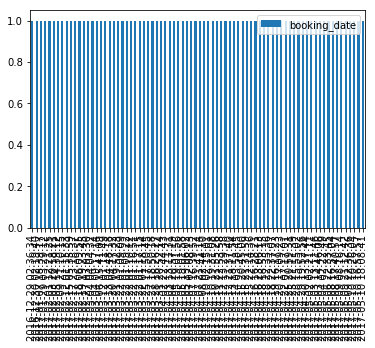

In [59]:
% matplotlib inline
selected_event_count_sorted.plot(kind='bar')

In [62]:
event = pd.DataFrame(selected_event_count_sorted)

In [64]:
event['Date'] = pd.to_datetime(event.index)

In [67]:
event['Date'] = pd.to_datetime(event['Date'], errors='coerce').apply(lambda x: x.date())

In [68]:
event['Date'] = pd.to_datetime(event.Date)

In [70]:
event.head()

,booking_date,Date
2016-12-29 02:36:34,1,2016-12-29
2016-12-30 02:19:40,1,2016-12-30
2017-01-07 18:39:17,1,2017-01-07
2017-01-29 03:29:12,1,2017-01-29
2017-02-01 12:21:25,1,2017-02-01


In [71]:
event_count = pd.DataFrame(event["Date"].value_counts())

In [72]:
event_count

,Date
2017-03-22,6
2017-04-07,3
2017-05-09,3
2017-04-05,3
2017-05-10,3
2017-04-15,3
2017-04-10,3
2017-04-18,3
2017-05-03,2
2017-04-12,2


In [73]:
event_count_sorted = pd.DataFrame(event_count.sort_index())

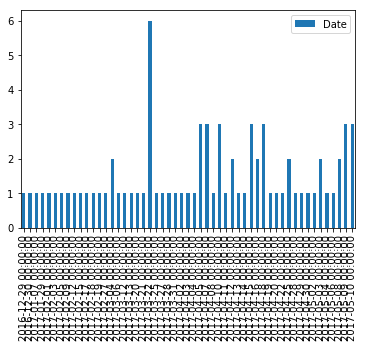

In [75]:
event_count_sorted.plot(kind='bar')

In [ ]:
events

In [2]:
selected_event = pd.DataFrame(dff[dff.events_datetimes == date])
    selected_event_count = pd.DataFrame(selected_event.booking_date.value_counts())
    selected_event_count_sorted = pd.DataFrame(selected_event_count.sort_index())
    event = pd.DataFrame(selected_event_count_sorted)
    event = pd.to_datetime(event.index)

IndentationError: unexpected indent (<ipython-input-2-a7e416de5692>, line 2)

In [ ]:
  prisitine = pd.DataFrame(Pristine_Sistine_booking_sorted)
    prisitine = pd.to_datetime(prisitine.index)

In [2]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import dash_table_experiments as dt
import pandas as pd

app = dash.Dash()

# app.scripts.config.serve_locally = True
# app.css.config.serve_locally = True

DF_GAPMINDER = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
)
DF_GAPMINDER = DF_GAPMINDER[DF_GAPMINDER['year'] == 2007]
DF_GAPMINDER.loc[0:20]

DF_SIMPLE = pd.DataFrame({
    'x': ['A', 'B', 'C', 'D', 'E', 'F'],
    'y': [4, 3, 1, 2, 3, 6],
    'z': ['a', 'b', 'c', 'a', 'b', 'c']
})


dataframes = {'DF_GAPMINDER': DF_GAPMINDER,
              'DF_SIMPLE': DF_SIMPLE}


def get_data_object(user_selection):
    '''
    For user selections, return the relevant in-memory data frame.
    '''
    return dataframes[user_selection]


app.layout = html.Div([
    html.H4('DataTable'),
    html.Label('Report type:', style={'font-weight': 'bold'}),
    dcc.Dropdown(
        id='field-dropdown',
        options=[{'label': df, 'value': df} for df in dataframes],
        value='DF_GAPMINDER',
        clearable=False
    ),
    dt.DataTable(
        # Initialise the rows
        rows=[{}],
        row_selectable=True,
        filterable=True,
        sortable=True,
        selected_row_indices=[],
        id='table'
    ),
    html.Div(id='selected-indexes')
], className="container")


@app.callback(Output('table', 'rows'), [Input('field-dropdown', 'value')])
def update_table(user_selection):
    '''
    For user selections, return the relevant table
    '''
    df = get_data_object(user_selection)
    return df.to_dict('records')


app.css.append_css({
    "external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"
})

if __name__ == '__main__':
    app.run_server(debug=False)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2017 09:01:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:01:37] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:01:37] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:01:37] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:01:38] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:01:49] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:01:52] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:01:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:01:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:01:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 09:02:03] "POST /_dash-update-component HTTP/1.1" 200 -


In [6]:
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table_experiments as dt
import json
import pandas as pd
import plotly

app = dash.Dash()

app.scripts.config.serve_locally = True


DF_SIMPLE = pd.DataFrame({
    'x': ['A', 'B', 'C', 'D', 'E', 'F'],
    'y': [4, 3, 1, 2, 3, 6],
    'z': ['a', 'b', 'c', 'a', 'b', 'c']
})


app.layout = html.Div([
    html.H4('Editable DataTable'),
    dt.DataTable(
        rows=DF_SIMPLE.to_dict('records'),

        # optional - sets the order of columns
        columns=sorted(DF_SIMPLE.columns),

        editable=True,

        id='editable-table'
    ),
    html.Div([
        html.Pre(id='output', className="two columns"),
        html.Div(
            dcc.Graph(
                id='graph',
                style={
                    'overflow-x': 'wordwrap'
                }
            ),
            className="ten columns"
        )
    ], className="row")
], className="container")


@app.callback(
    Output('output', 'children'),
    [Input('editable-table', 'rows')])
def update_selected_row_indices(rows):
    return json.dumps(rows, indent=2)


@app.callback(
    Output('graph', 'figure'),
    [Input('editable-table', 'rows')])
def update_figure(rows):
    dff = pd.DataFrame(rows)
    return {
        'data': [{
            'x': dff['x'],
            'y': dff['y'],
        }],
        'layout': {
            'margin': {'l': 10, 'r': 0, 't': 10, 'b': 20}
        }
    }


app.css.append_css({
    "external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"
})

if __name__ == '__main__':
    app.run_server(debug=False)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2017 10:56:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:56:30] "GET /_dash-component-suites/dash_renderer/react@15.4.2.min.js?v=0.11.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:56:30] "GET /_dash-component-suites/dash_renderer/react-dom@15.4.2.min.js?v=0.11.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:56:30] "GET /_dash-component-suites/dash_html_components/bundle.js?v=0.8.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:56:30] "GET /_dash-component-suites/dash_table_experiments/bundle.js?v=0.5.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:56:30] "GET /_dash-component-suites/dash_core_components/plotly-1.31.0.min.js?v=0.13.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:56:30] "GET /_dash-component-suites/dash_core_components/bundle.js?v=0.13.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:56:30] "GET /_dash-component-suites/dash_renderer/bundle.js?v=0.11.0 HTTP/1.1" 200 -
127.0.0.1 - 

In [8]:
import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table_experiments as dt
import json
import pandas as pd
import numpy as np
import plotly

app = dash.Dash()

app.scripts.config.serve_locally = True
# app.css.config.serve_locally = True

DF_WALMART = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')

DF_GAPMINDER = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
)
DF_GAPMINDER = DF_GAPMINDER[DF_GAPMINDER['year'] == 2007]
DF_GAPMINDER.loc[0:20]

DF_SIMPLE = pd.DataFrame({
    'x': ['A', 'B', 'C', 'D', 'E', 'F'],
    'y': [4, 3, 1, 2, 3, 6],
    'z': ['a', 'b', 'c', 'a', 'b', 'c']
})

ROWS = [
    {'a': 'AA', 'b': 1},
    {'a': 'AB', 'b': 2},
    {'a': 'BB', 'b': 3},
    {'a': 'BC', 'b': 4},
    {'a': 'CC', 'b': 5},
    {'a': 'CD', 'b': 6}
]


app.layout = html.Div([
    html.H4('Gapminder DataTable'),
    dt.DataTable(
        rows=DF_GAPMINDER.to_dict('records'),

        # optional - sets the order of columns
        columns=sorted(DF_GAPMINDER.columns),

        row_selectable=True,
        filterable=True,
        sortable=True,
        selected_row_indices=[],
        id='datatable-gapminder'
    ),
    html.Div(id='selected-indexes'),
    dcc.Graph(
        id='graph-gapminder'
    ),
], className="container")


@app.callback(
    Output('datatable-gapminder', 'selected_row_indices'),
    [Input('graph-gapminder', 'clickData')],
    [State('datatable-gapminder', 'selected_row_indices')])
def update_selected_row_indices(clickData, selected_row_indices):
    if clickData:
        for point in clickData['points']:
            if point['pointNumber'] in selected_row_indices:
                selected_row_indices.remove(point['pointNumber'])
            else:
                selected_row_indices.append(point['pointNumber'])
    return selected_row_indices


@app.callback(
    Output('graph-gapminder', 'figure'),
    [Input('datatable-gapminder', 'rows'),
     Input('datatable-gapminder', 'selected_row_indices')])
def update_figure(rows, selected_row_indices):
    dff = pd.DataFrame(rows)
    fig = plotly.tools.make_subplots(
        rows=3, cols=1,
        subplot_titles=('Life Expectancy', 'GDP Per Capita', 'Population',),
        shared_xaxes=True)
    marker = {'color': ['#0074D9']*len(dff)}
    for i in (selected_row_indices or []):
        marker['color'][i] = '#FF851B'
    fig.append_trace({
        'x': dff['country'],
        'y': dff['lifeExp'],
        'type': 'bar',
        'marker': marker
    }, 1, 1)
    fig.append_trace({
        'x': dff['country'],
        'y': dff['gdpPercap'],
        'type': 'bar',
        'marker': marker
    }, 2, 1)
    fig.append_trace({
        'x': dff['country'],
        'y': dff['pop'],
        'type': 'bar',
        'marker': marker
    }, 3, 1)
    fig['layout']['showlegend'] = False
    fig['layout']['height'] = 800
    fig['layout']['margin'] = {
        'l': 40,
        'r': 10,
        't': 60,
        'b': 200
    }
    fig['layout']['yaxis3']['type'] = 'log'
    return fig


app.css.append_css({
    "external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"
})

if __name__ == '__main__':
    app.run_server(debug=False)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2017 10:57:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:57:54] "GET /_dash-component-suites/dash_renderer/react@15.4.2.min.js?v=0.11.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:57:54] "GET /_dash-component-suites/dash_renderer/react-dom@15.4.2.min.js?v=0.11.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:57:54] "GET /_dash-component-suites/dash_html_components/bundle.js?v=0.8.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:57:54] "GET /_dash-component-suites/dash_table_experiments/bundle.js?v=0.5.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:57:54] "GET /_dash-component-suites/dash_core_components/plotly-1.31.0.min.js?v=0.13.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:57:54] "GET /_dash-component-suites/dash_core_components/bundle.js?v=0.13.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2017 10:57:54] "GET /_dash-component-suites/dash_renderer/bundle.js?v=0.11.0 HTTP/1.1" 200 -
127.0.0.1 - 

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



127.0.0.1 - - [12/Dec/2017 10:57:56] "GET /favicon.ico HTTP/1.1" 200 -


In [ ]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import dash_table_experiments as dt
import pandas as pd

app = dash.Dash()

# app.scripts.config.serve_locally = True
# app.css.config.serve_locally = True

merged_event = pd.read_excel('C://walks_data//merged_Event.xlsx')

#DF_GAPMINDER = pd.read_csv(
#    'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
#)

#DF_GAPMINDER = DF_GAPMINDER[DF_GAPMINDER['year'] == 2007]
#DF_GAPMINDER.loc[0:20]

DF_SIMPLE = pd.DataFrame({
    'x': ['A', 'B', 'C', 'D', 'E', 'F'],
    'y': [4, 3, 1, 2, 3, 6],
    'z': ['a', 'b', 'c', 'a', 'b', 'c']
})


dataframes = {'DF_GAPMINDER': merged_event,
              'DF_SIMPLE': DF_SIMPLE}


def get_data_object(user_selection):
    '''
    For user selections, return the relevant in-memory data frame.
    '''
    return dataframes[user_selection]


app.layout = html.Div([
    html.H4('DataTable'),
    html.Label('Report type:', style={'font-weight': 'bold'}),
    dcc.Dropdown(
        id='field-dropdown',
        options=[{'label': 'Rome - Premium Colosseum', 'value': "Rome - Premium Colosseum"},
                {'label': 'Vatican - Pristine Sistine', 'value': 'Vatican - Pristine Sistine'},
                {'label': 'Florence - Best of Florence', 'value': 'Florence - Best of Florence'},
                {'label': 'Rome - Crypts & Catacombs', 'value': 'Rome - Crypts & Catacombs'},
                {'label': 'Venice - Legendary Venice', 'value': 'Venice - Legendary Venice'},
                {'label': 'Pompeii - Best of Pompeii', 'value': 'Pompeii - Best of Pompeii'},
                {'label': 'Rome - Welcome to Rome ', 'value': 'Rome - Welcome to Rome '},
                {'label': 'Rome - VIP Colosseum Underground', 'value':'Rome - VIP Colosseum Underground'},
                {'label': 'Statue of Liberty & 9/11 Full Day ', 'value': 'Statue of Liberty & 9/11 Full Day '},
                {'label': 'VIP Manhattan Nightlife Tour by Limo', 'value': 'VIP Manhattan Nightlife Tour by Limo'},
                {'label': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty', 'value': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty'},
                {'label': 'POP UP TOUR NYC - Chinatown ', 'value': 'POP UP TOUR NYC - Chinatown '}
              ],
        value='Vatican - Pristine Sistine',
        clearable=False
    ),
    dt.DataTable(
        # Initialise the rows
        rows=[{}],
        row_selectable=True,
        filterable=True,
        sortable=True,
        selected_row_indices=[],
        id='table'
    ),
    html.Div(id='selected-indexes')
], className="container")


html.Div([html.H4('Booking Distribution according to city and package location'),
          html.P("Select the Dropdown Menu to See Booking Distribution"),
          dcc.Dropdown(
              id='my-dropdown',
              options=[
                  {'label': 'Rome - Premium Colosseum', 'value': "Rome - Premium Colosseum"},
                  {'label': 'Vatican - Pristine Sistine', 'value': 'Vatican - Pristine Sistine'},
                  {'label': 'Florence - Best of Florence', 'value': 'Florence - Best of Florence'},
                  {'label': 'Rome - Crypts & Catacombs', 'value': 'Rome - Crypts & Catacombs'},
                  {'label': 'Venice - Legendary Venice', 'value': 'Venice - Legendary Venice'},
                  {'label': 'Pompeii - Best of Pompeii', 'value': 'Pompeii - Best of Pompeii'},
                  {'label': 'Rome - Welcome to Rome ', 'value': 'Rome - Welcome to Rome '},
                  {'label': 'Rome - VIP Colosseum Underground', 'value':'Rome - VIP Colosseum Underground'},
                  {'label': 'Statue of Liberty & 9/11 Full Day ', 'value': 'Statue of Liberty & 9/11 Full Day '},
                  {'label': 'VIP Manhattan Nightlife Tour by Limo', 'value': 'VIP Manhattan Nightlife Tour by Limo'},
                  {'label': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty', 'value': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty'},
                  {'label': 'POP UP TOUR NYC - Chinatown ', 'value': 'POP UP TOUR NYC - Chinatown '}
              ],
              value='Vatican - Pristine Sistine'
          ),
          dcc.Graph(id='month-graph')
         ], 
         style={'width': '40%'}), 

@app.callback(Output('month-graph', 'figure'), [Input('my-dropdown', 'value')])

def update_graph(selected_dropdown_value):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    Pristine_Sistine_booking= pd.DataFrame(dff["events_datetimes"].value_counts())
    Pristine_Sistine_booking_sorted = pd.DataFrame(Pristine_Sistine_booking.sort_index())
    prisitine = pd.DataFrame(Pristine_Sistine_booking_sorted)
    prisitine = pd.to_datetime(prisitine.index)
    return {
        'data': [{
            'x': prisitine,
            'y': Pristine_Sistine_booking_sorted.events_datetimes
        }],
            'layout': {'margin': {'l': 50, 'r': 5, 't': 20, 'b': 65}}
    }
app.css.append_css({'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})

#Table

@app.callback(
    dash.dependencies.Output('output-container-date-picker-single', 'children'),
    [dash.dependencies.Input('my-date-picker-single', 'date')])
def update_output(date):
    string_prefix = 'You have selected: '
    if date is not None:
        date = db.strptime(date, '%Y-%m-%d')
        date_string = date.strftime('%B %d, %Y')
        return string_prefix + date_string

@app.callback(
    dash.dependencies.Output('way-graph', 'figure'),
    [dash.dependencies.Input('my-date-picker-single', 'date'),
    dash.dependencies.Input('my-dropdown', 'value')])
def update_graph(date, selected_dropdown_value):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())
    dff["timedate"] = pd.to_datetime(dff.timedate)
    selected_event = pd.DataFrame(dff[dff.timedate == date])
    selected_event_count = pd.DataFrame(selected_event.booking_date.value_counts())
    selected_event_count_sorted = pd.DataFrame(selected_event_count.sort_index())
    event = pd.DataFrame(selected_event_count_sorted)
    event['Date'] = pd.to_datetime(event.index)
    event['Date'] = pd.to_datetime(event['Date'], errors='coerce').apply(lambda x: x.date())
    event['Date'] = pd.to_datetime(event.Date)
    event_count = pd.DataFrame(event["Date"].value_counts())
    event_count_sorted = pd.DataFrame(event_count.sort_index())
    events = pd.DataFrame(event_count_sorted)
    events = pd.to_datetime(events.index)
    return {
        'data': [{
            'x': events,
            'y': event_count_sorted.Date
        }],
            'layout': {'margin': {'l': 50, 'r': 5, 't': 20, 'b': 65}}
    }
app.css.append_css({'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})

#Table


@app.callback(
dash.dependencies.Output('table', 'rows'),
[dash.dependencies.Input('my-date-picker-single', 'date'),
dash.dependencies.Input('my-dropdown', 'value')])    

def update_table(date, selected_dropdown_value):
    '''
    For user selections, return the relevant table
    '''
    
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())
    dff["timedate"] = pd.to_datetime(dff.timedate)
    selected_event = pd.DataFrame(dff[dff.timedate == date])
    df = get_data_object(user_selection)
    return df.to_dict('records')


app.css.append_css({
    "external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"
})

if __name__ == '__main__':
    app.run_server(debug=False)

In [5]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import dash_table_experiments as dt
import pandas as pd

app = dash.Dash()


#app.scripts.config.serve_locally = True
#app.css.config.serve_locally = True

merged_event = pd.read_excel('C://walks_data//merged_Event.xlsx')


app.layout = html.Div([
    html.Div([
    dcc.Dropdown(
    id='my-dropdown', 
    options=[
                  {'label': 'Rome - Premium Colosseum', 'value': "Rome - Premium Colosseum"},
                  {'label': 'Vatican - Pristine Sistine', 'value': 'Vatican - Pristine Sistine'},
                  {'label': 'Florence - Best of Florence', 'value': 'Florence - Best of Florence'},
                  {'label': 'Rome - Crypts & Catacombs', 'value': 'Rome - Crypts & Catacombs'},
                  {'label': 'Venice - Legendary Venice', 'value': 'Venice - Legendary Venice'},
                  {'label': 'Pompeii - Best of Pompeii', 'value': 'Pompeii - Best of Pompeii'},
                  {'label': 'Rome - Welcome to Rome ', 'value': 'Rome - Welcome to Rome '},
                  {'label': 'Rome - VIP Colosseum Underground', 'value':'Rome - VIP Colosseum Underground'},
                  {'label': 'Statue of Liberty & 9/11 Full Day ', 'value': 'Statue of Liberty & 9/11 Full Day '},
                  {'label': 'VIP Manhattan Nightlife Tour by Limo', 'value': 'VIP Manhattan Nightlife Tour by Limo'},
                  {'label': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty', 'value': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty'},
                  {'label': 'POP UP TOUR NYC - Chinatown ', 'value': 'POP UP TOUR NYC - Chinatown '}
              ],
    value='Vatican - Pristine Sistine'
          ),
], 
         style={'width': '40%'}), 
    
    html.Div([
    dt.DataTable(
    # Initialise the rows
    rows=[{}],
    row_selectable=True,
    filterable=True,
    sortable=True,
    selected_row_indices=[],
    id='table'
    ),
    html.Div(id='selected-indexes')
], className="container"),
    
    
#html.Div(
#dt.DataTable(rows=[{}], 
#id='table-container'), style={'display': 'none'},),
    
    html.Div([html.H4('Pick the event date for particular location to see the distribution'),
    dcc.DatePickerSingle(
        id='my-date-picker-single',
        min_date_allowed=db(2015, 1, 5),
        max_date_allowed=db(2018, 11, 11),
        initial_visible_month=db(2017, 8, 5),
        date=db(2017, 5, 11)
    ),
          html.Div(id='output-container-date-picker-single') ]) 
    
])

@app.callback(Output('table', 'rows'), 
              [Input('my-dropdown', 'value'),
              Input('my-date-picker-single', 'date')])

def update_table(selected_dropdown_value, date):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    dff["events_datetimes"] = pd.to_datetime(dff.events_datetimes, errors='coerce')
    dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())
    dff["timedate"] = pd.to_datetime(dff.timedate)
    selected_event = pd.DataFrame(dff[dff.timedate == date]) # update with your own logic
    selected_event["timedate"] = pd.to_datetime(selected_event.timedate)
    return selected_event.to_dict('records')

app.css.append_css({
    "external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"
})

if __name__ == '__main__':
    app.run_server(debug=False)


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Dec/2017 11:20:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:10] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:10] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:11] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:18] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:35] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:35] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:36] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [20/Dec/2017 11:20:45] "POST /_d

In [ ]:
# USe this one for to show

import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly
import json


from pandas_datareader import data as web
from datetime import datetime as db
import dash_table_experiments as dt


merged_event = pd.read_excel('C://walks_data//merged_Event.xlsx')


dataframes = {'Booking_per_location': merged_event,
              'Booking_Per_event_date': selected_event}

#Table selection for user function defined

def get_data_object(user_selection):
    '''
    For user selections, return the relevant in-memory data frame.
    '''
    return dataframes[user_selection]

app = dash.Dash('booking')


app.layout = html.Div([html.Div([html.H2('Booking in advance'),

# DatePicker
                           
html.Div([html.H4('Pick the event date for particular location to see the distribution'),
    dcc.DatePickerSingle(
        id='my-date-picker-single',
        min_date_allowed=db(2015, 1, 5),
        max_date_allowed=db(2018, 11, 11),
        initial_visible_month=db(2017, 8, 5),
        date=db(2017, 5, 11)
    ),
          html.Div(id='output-container-date-picker-single') ]) ,
                                                        

# Dropdown                       
                       
html.Div([html.H4('Booking Distribution according to city and package location'),
          html.P("Select the Dropdown Menu to See Booking Distribution"),
          dcc.Dropdown(
              id='my-dropdown',
              options=[
                  {'label': 'Rome - Premium Colosseum', 'value': "Rome - Premium Colosseum"},
                  {'label': 'Vatican - Pristine Sistine', 'value': 'Vatican - Pristine Sistine'},
                  {'label': 'Florence - Best of Florence', 'value': 'Florence - Best of Florence'},
                  {'label': 'Rome - Crypts & Catacombs', 'value': 'Rome - Crypts & Catacombs'},
                  {'label': 'Venice - Legendary Venice', 'value': 'Venice - Legendary Venice'},
                  {'label': 'Pompeii - Best of Pompeii', 'value': 'Pompeii - Best of Pompeii'},
                  {'label': 'Rome - Welcome to Rome ', 'value': 'Rome - Welcome to Rome '},
                  {'label': 'Rome - VIP Colosseum Underground', 'value':'Rome - VIP Colosseum Underground'},
                  {'label': 'Statue of Liberty & 9/11 Full Day ', 'value': 'Statue of Liberty & 9/11 Full Day '},
                  {'label': 'VIP Manhattan Nightlife Tour by Limo', 'value': 'VIP Manhattan Nightlife Tour by Limo'},
                  {'label': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty', 'value': 'NEW! Twisted Statue Tour: Under the Skirt of Lady Liberty'},
                  {'label': 'POP UP TOUR NYC - Chinatown ', 'value': 'POP UP TOUR NYC - Chinatown '}
              ],
              value='Vatican - Pristine Sistine'
          ),
          dcc.Graph(id='month-graph')
         ], 
         style={'width': '45%', 'float': 'left', 'display': 'inline-block'}), 

# Booking_event graph
                                 
html.Div([html.H4("Distribution of booking for particular date"), 
              dcc.Graph(figure={'data': [{'x':[1,2], 'y': [3, 1]}]}, id='way-graph')],
          style={'width': '55%','float': 'left', 'display': 'inline-block'})
]),                                 
                                 
#Table Layout                           
                                 
html.Div([
    html.H4('DataTable'),
    html.Label('Report type:', style={'font-weight': 'bold'}),
 html.Div([
    dt.DataTable(
    # Initialise the rows
    rows=[{}],
    row_selectable=True,
    filterable=True,
    sortable=True,
    selected_row_indices=[],
    id='table'
    ),
    html.Div(id='selected-indexes')
], className="container")

])
                       
                      ] )                       


@app.callback(Output('month-graph', 'figure'), [Input('my-dropdown', 'value')])

def update_graph(selected_dropdown_value):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    Pristine_Sistine_booking= pd.DataFrame(dff["events_datetimes"].value_counts())
    Pristine_Sistine_booking_sorted = pd.DataFrame(Pristine_Sistine_booking.sort_index())
    prisitine = pd.DataFrame(Pristine_Sistine_booking_sorted)
    prisitine = pd.to_datetime(prisitine.index)
    return {
        'data': [{
            'x': prisitine,
            'y': Pristine_Sistine_booking_sorted.events_datetimes
        }],
            'layout': {'margin': {'l': 50, 'r': 5, 't': 20, 'b': 65}}
    }
app.css.append_css({'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})


@app.callback(
    dash.dependencies.Output('output-container-date-picker-single', 'children'),
    [dash.dependencies.Input('my-date-picker-single', 'date')])
def update_output(date):
    string_prefix = 'You have selected: '
    if date is not None:
        date = db.strptime(date, '%Y-%m-%d')
        date_string = date.strftime('%B %d, %Y')
        return string_prefix + date_string

@app.callback(
    dash.dependencies.Output('way-graph', 'figure'),
    [dash.dependencies.Input('my-date-picker-single', 'date'),
    dash.dependencies.Input('my-dropdown', 'value')])
def update_graph(date, selected_dropdown_value):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())
    dff["timedate"] = pd.to_datetime(dff.timedate)
    selected_event = pd.DataFrame(dff[dff.timedate == date])
    selected_event_count = pd.DataFrame(selected_event.booking_date.value_counts())
    selected_event_count_sorted = pd.DataFrame(selected_event_count.sort_index())
    event = pd.DataFrame(selected_event_count_sorted)
    event['Date'] = pd.to_datetime(event.index)
    event['Date'] = pd.to_datetime(event['Date'], errors='coerce').apply(lambda x: x.date())
    event['Date'] = pd.to_datetime(event.Date)
    event_count = pd.DataFrame(event["Date"].value_counts())
    event_count_sorted = pd.DataFrame(event_count.sort_index())
    events = pd.DataFrame(event_count_sorted)
    events = pd.to_datetime(events.index)
    return {
        'data': [{
            'x': events,
            'y': event_count_sorted.Date
        }],
            'layout': {'margin': {'l': 50, 'r': 5, 't': 20, 'b': 65}}
    }
app.css.append_css({'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})

# Update Table
    
@app.callback(Output('table', 'rows'), 
              [Input('my-dropdown', 'value'),
              Input('my-date-picker-single', 'date')])

def update_table(selected_dropdown_value, date):
    dff = pd.DataFrame(merged_event[merged_event.name_short == selected_dropdown_value])
    dff["events_datetimes"] = pd.to_datetime(dff.events_datetimes, errors='coerce')
    dff["timedate"] = pd.to_datetime(dff['events_datetimes'], errors='coerce').apply(lambda x: x.date())
    dff["timedate"] = pd.to_datetime(dff.timedate)
    selected_event = pd.DataFrame(dff[dff.timedate == date]) # update with your own logic
    selected_event["timedate"] = pd.to_datetime(selected_event.timedate)
    return selected_event.to_dict('records')

app.css.append_css({
    "external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"
})

if __name__ == '__main__':
    app.run_server(debug=False)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Dec/2017 13:26:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:26:57] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:26:57] "GET /_dash-dependencies HTTP/1.1" 200 -
[2017-12-29 13:26:58,171] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\_compat.py", line 33, in reraise
    raise value
  File "C:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1612, in fu

127.0.0.1 - - [29/Dec/2017 13:35:39] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:39] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:39] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:44] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:44] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:44] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:47] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:47] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:47] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [29/Dec/2017 13:35:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.